# Ký hiệu Ngôn Ngữ Cử Bàn Tay Sử Dụng CNN Để Huấn Luyện




In [2]:
# thêm các thư viện
import numpy as np  #thư viện numpy
import pandas as pd    #thư viện pandas
import matplotlib.pyplot as plt # thư viện matplotlib 
import seaborn as sns # thư viện searborn vẽ biểu đồ

In [3]:
# ở đây khai báo dữ liệu để huấn luyện ( sử dụng dữ liệu từ kaggle các tọa độ điểm ảnh cử chỉ được tạo sẵn)
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [4]:
# kiểm tra dữ liệu được thêm vào
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# tạo nhãn huấn luyện 
labels = train['label'].values

In [6]:
#xem các nhãn tổng cộng có 24 nhãn tương đương bảng chữ cái 24 chữ
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:xlabel='count'>

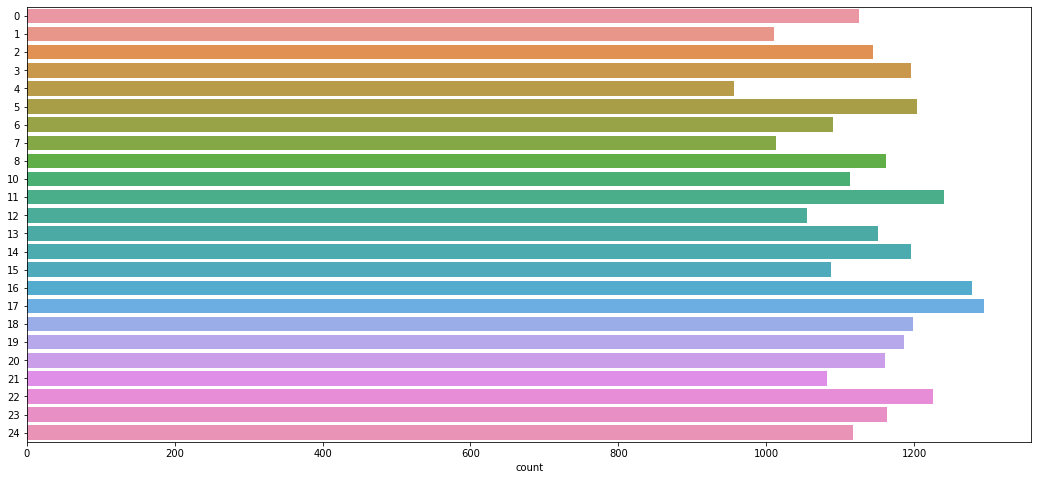

In [7]:
# Vẽ biểu đồ từ các nhãn được khai báo
plt.figure(figsize = (18,8))
sns.countplot(y =labels)

In [8]:
# bỏ nhãn để dữ liệu về dạng chuỗi số để dễ dàng huấn luyện 
train.drop('label', axis = 1, inplace = True)

In [9]:
# Trích xuất những hình ảnh dữ liệu csv từ mỗi hàng của chúng tôi trong lưu trữ nhớ nó trong một hàng của 784 cột
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [14]:
# mã hóa dữ liệu các nhãn được tách ra trước đó
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [15]:
# xem các nhãn được mã hóa
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


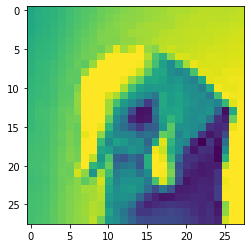

In [19]:
# kiểm tra hình ảnh
index = 5
print(labels[index])
plt.imshow(images[index].reshape(28,28)) # định dạng kích thước hình ảnh trích xuất

In [20]:
# Sử dụng OpenCV để xem 20 hình ảnh ngẫu nhiên từ dữ liệu đào tạo
import cv2
import numpy as np

for i in range(0,20):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=20, fy=20, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0) 
    
cv2.destroyAllWindows()

In [21]:
# Chia dữ liệu của chúng tôi thành x_train, x_test, y_train và y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [22]:
# sử dụng thư viện tensorflow để xác định kích thước của từng tập dữ liệu huấn luyện
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 200
num_classes = 24
epochs = 20

In [24]:
# chia tỉ lệ hình ảnh
x_train = x_train / 255
x_test = x_test / 255

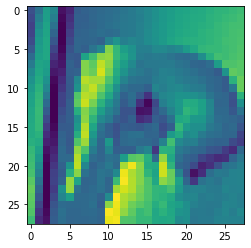

In [25]:
# định hình kích thước yêu cầu theo thư viện
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[1].reshape(28,28))

In [26]:
# tạo mô hình để huấn luyện sử dụng thuật toán CNN để huấn luyện mô hình
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [27]:
# Biên dịch mô hình 
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [29]:
# Huấn Luyện Mô hình''
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
97/97 [==============================] - 14s 136ms/step - loss: 2.7976 - accuracy: 0.1566 - val_loss: 1.9431 - val_accuracy: 0.4383
Epoch 2/20
97/97 [==============================] - 13s 137ms/step - loss: 1.5437 - accuracy: 0.4928 - val_loss: 1.0599 - val_accuracy: 0.6717
Epoch 3/20
97/97 [==============================] - 13s 138ms/step - loss: 0.9856 - accuracy: 0.6706 - val_loss: 0.7926 - val_accuracy: 0.7381
Epoch 4/20
97/97 [==============================] - 13s 139ms/step - loss: 0.7329 - accuracy: 0.7582 - val_loss: 0.5262 - val_accuracy: 0.8332
Epoch 5/20
97/97 [==============================] - 13s 134ms/step - loss: 0.5419 - accuracy: 0.8177 - val_loss: 0.3997 - val_accuracy: 0.8792
Epoch 6/20
97/97 [==============================] - 13s 138ms/step - loss: 0.4254 - accuracy: 0.8599 - val_loss: 0.3029 - val_accuracy: 0.9088
Epoch 7/20
97/97 [==============================] - 13s 138ms/step - loss: 0.3249 - accuracy: 0.8927 - val_loss: 0.2899 - val_accuracy: 0.9019

In [30]:
# lưu mô hình được huấn luyện
model.save("CNN.h5")
print("Model Saved")

Model Saved


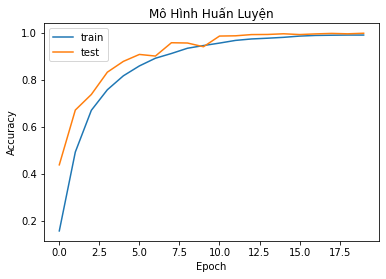

In [31]:
# xem quá trình huấn luyện thông qua biểu đồ
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Mô Hình Huấn Luyện")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.show()

In [32]:
# Định hình dữ liệu trước khi kiểm tra
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [33]:
# Độ chính xác sau khi huấn luyện
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.8611266034578918

In [34]:
# tạo nhãn chữ cái để test
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

# Kiểm tra hình ảnh được huấn luyện qua Camera

In [26]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [40]:
import cv2
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    ##############################
    frame=cv2.flip(frame, 1)

    #xác định khu vực tính toán
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1) 

    result = str(model.predict_classes(roi, 2, verbose = 1)[0])
    cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13: #nhân enter để thoát
        break
        
cap.release()
cv2.destroyAllWindows() 

1/1 [==============================] - 0s 14ms/step


In [38]:
cap.release()
cv2.destroyAllWindows() 